#Resume Screening

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install --upgrade pip
!pip install nltk
!pip install seaborn
!pip install gensim
!pip install sklearn
!pip install wordcloud

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-uninstall-pt802zkc\\pip.exe'
Consider using the `--user` option or check the permissions.



^C


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
resume_df = pd.read_csv('resume_data.csv', encoding = 'latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [ ]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [ ]:
resume_df = resume_df[['resume_text', 'class']]
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


In [ ]:
# REMOVING UNNECESSARY WORDS FROM DATASET

resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x .replace('\r', ''))

nltk.download('punkt') # PUNCTUATIONS
nltk.download('stopwords') # CONJUNCTIONS , PREPOSITIONS AND OTHER SENTENCE FILLERS

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com']) # ADDING MORE WORDS WHICH ARE NOT RELEVANT BUT ARE MOST COMMON

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [ ]:
resume_df['cleaned'][0]

'customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research pro

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


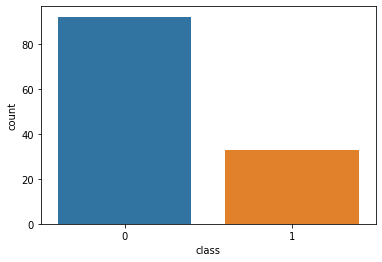

In [ ]:
# PLOTTING COUNTS OF SAMPLE LABELLED AS 1 AND 0
sns.countplot(resume_df['class'], label = 'Count Plot')
plt.show()

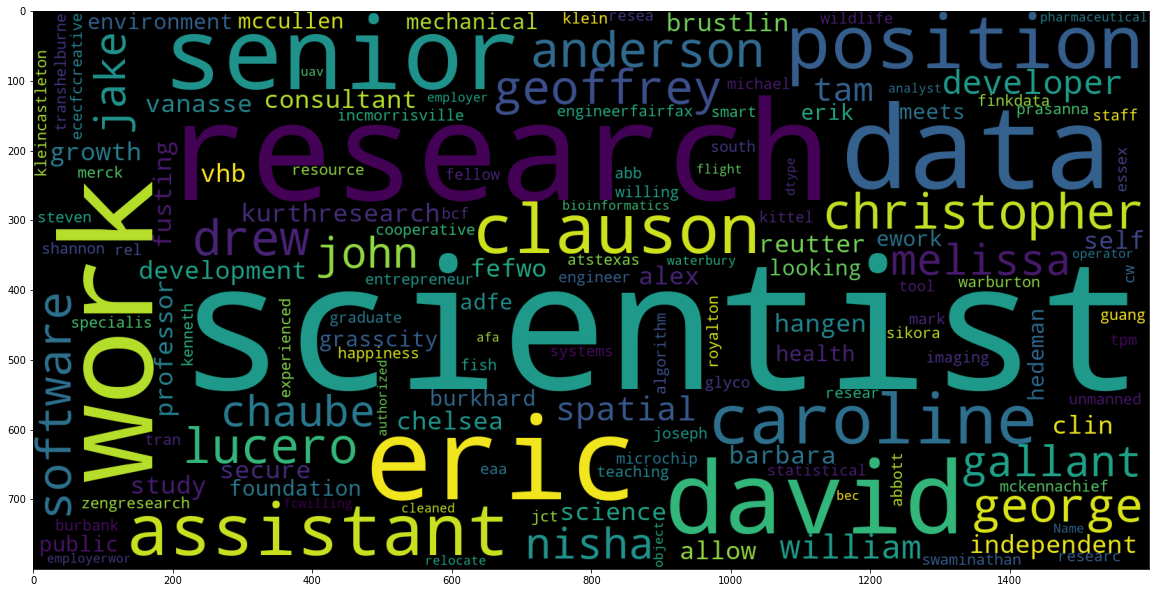

In [ ]:
# 1) FOR CLASS 1:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))

plt.imshow(wc)

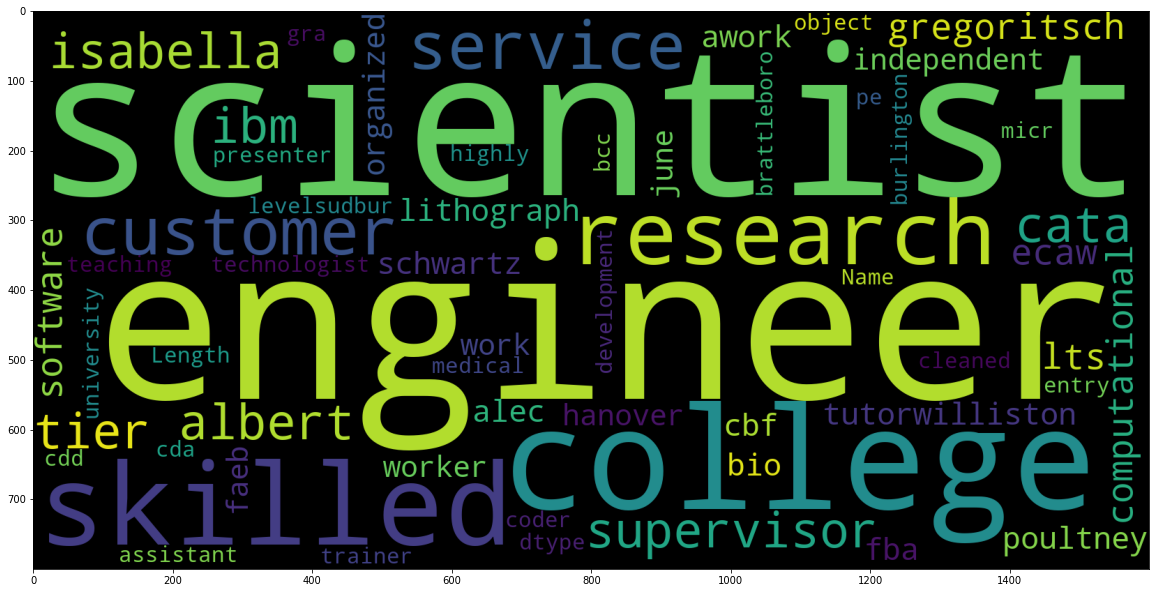

In [ ]:
# 1) FOR CLASS 0:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))

plt.imshow(wc)

In [ ]:
# CONVERTING SENTENCES INTO TOKENIZED FORMS AND THEN CONVERTING TO NUMERICAL VALUES IN ORDER FOR THE MODEL TO TRAIN:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

In [ ]:
# PROCESSED DATA:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#Model application

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

X = countvectorizer
y = resume_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
def model_app(model_name):

  print("\n")
  print(model_name)

  model_name.fit(X_train, y_train)  ## Training the model

  # PLOTTING CONFUSION MATRIX:

  # 1) FOR TRAINING DATA

  y_pred_train = model_name.predict(X_train)

  cm = confusion_matrix(y_train, y_pred_train)

  sns.heatmap(cm, annot=True)

  plt.show()

  # 2) FOR TEST DATA:

  y_pred_test = model_name.predict(X_test)

  cm = confusion_matrix(y_test, y_pred_test)

  sns.heatmap(cm, annot=True)

  plt.show()

  print(classification_report(y_test, y_pred_test))

  

  print("Accuracy of model on Train Dataset = {}".format(accuracy_score(y_train, y_pred_train)))
  print("Accuracy of model on Test Dataset = {}".format(accuracy_score(y_test, y_pred_test)))







MultinomialNB(alpha=3)


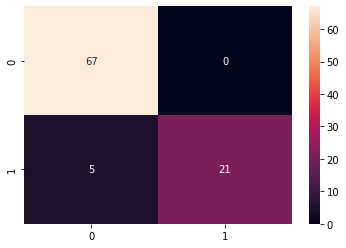

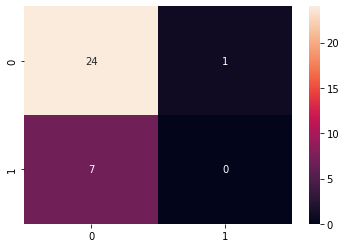

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.00      0.00      0.00         7

    accuracy                           0.75        32
   macro avg       0.39      0.48      0.43        32
weighted avg       0.60      0.75      0.67        32

Accuracy of model on Train Dataset = 0.946236559139785
Accuracy of model on Test Dataset = 0.75


RandomForestClassifier(max_depth=8, min_samples_leaf=3, n_estimators=200)


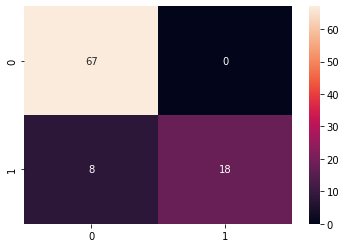

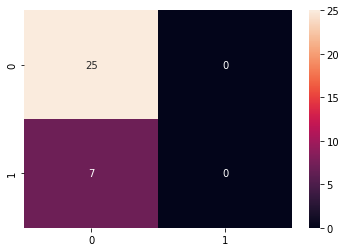

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88        25
           1       0.00      0.00      0.00         7

    accuracy                           0.78        32
   macro avg       0.39      0.50      0.44        32
weighted avg       0.61      0.78      0.69        32

Accuracy of model on Train Dataset = 0.9139784946236559
Accuracy of model on Test Dataset = 0.78125


DecisionTreeClassifier(max_depth=3)


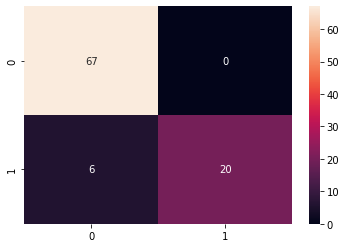

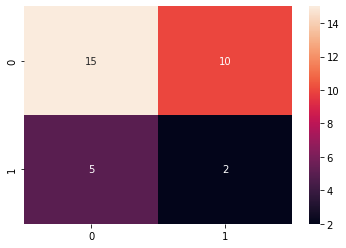

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        25
           1       0.17      0.29      0.21         7

    accuracy                           0.53        32
   macro avg       0.46      0.44      0.44        32
weighted avg       0.62      0.53      0.57        32

Accuracy of model on Train Dataset = 0.9354838709677419
Accuracy of model on Test Dataset = 0.53125


KNeighborsClassifier(n_neighbors=13)


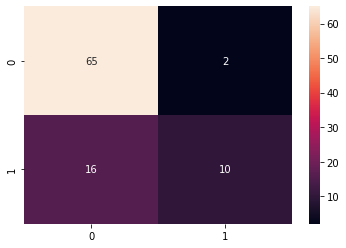

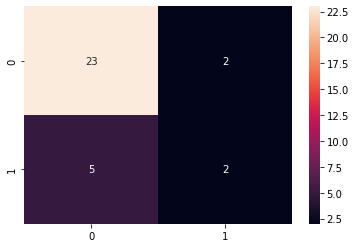

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.50      0.29      0.36         7

    accuracy                           0.78        32
   macro avg       0.66      0.60      0.62        32
weighted avg       0.75      0.78      0.76        32

Accuracy of model on Train Dataset = 0.8064516129032258
Accuracy of model on Test Dataset = 0.78125


SVC()


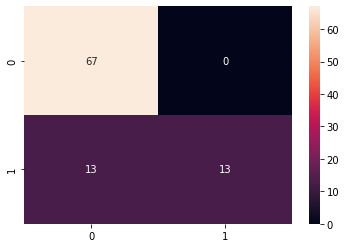

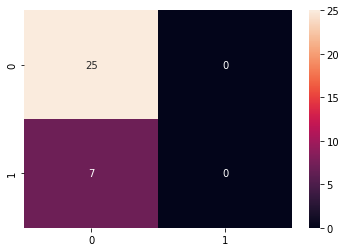

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        25
           1       0.00      0.00      0.00         7

    accuracy                           0.78        32
   macro avg       0.39      0.50      0.44        32
weighted avg       0.61      0.78      0.69        32

Accuracy of model on Train Dataset = 0.8602150537634409
Accuracy of model on Test Dataset = 0.78125


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm , tree

models = [MultinomialNB(alpha=3), RandomForestClassifier(n_estimators=200,max_depth=8,min_samples_leaf=3) , tree.DecisionTreeClassifier(criterion="gini",max_depth=3) , KNeighborsClassifier(n_neighbors=13),svm.SVC(kernel="rbf")]

for i in models:
  model_app(i)

Minimum error:- 0.21875 at K = 9


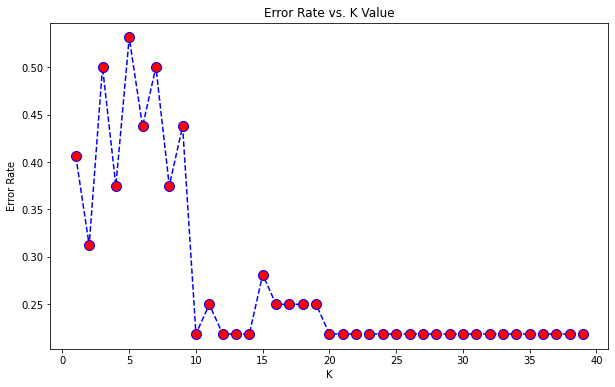

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))